# Evaluating proportion of green transitions

date: 20.11.2025

In this notebook I run a several initial configurations to show the evolution of the green transition with differente inital conditions

In a system with 3 interacting agents, Voter Dynamics, fully connected network

Add the option to record emissions or not

In [ ]:
#import functions from src file
import os
import sys

# Get the absolute path of the parent directory (project root)
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))

# Add it to the Python path
if project_root not in sys.path:
    sys.path.append(project_root)

# Now import necessary functions
from src.ABRam_BG_V01 import *

In [2]:
#Import necessary packages 
import pandas as pd
import numpy as np
import agentpy as ap
import matplotlib.pyplot as plt
import random

In [35]:
#We set the parameter values for the farms
alpha, delta, rho = 0.33, 0.05, 0.99
#Parameter such that farms investment is bigger that its capital depreciation, i.e I > delta K
Omega = (delta + (1/(rho*alpha)))**(1/(1 - alpha))
#Parameter such that farms investment is positive
omega = ((1-delta)/(alpha*rho))**(1/(1-alpha))
#Periods 
periods = 100

In [36]:
# Configuration with 20% green in the system
perc = 0.2

#Number of farms in the system
Farms = 100
green_farms = int(perc*Farms)
brown_farms = Farms - green_farms

#Total Initial capital in the systes
Tot_K0 = 10
Tot_G0 = perc*Tot_K0
Tot_B0 = Tot_K0 - Tot_G0

K0 = Tot_K0/Farms
L0 = 1/Farms


In [37]:
#We declare the dictionary of parameters for the simulation 
parameters = {
    'agents':Farms,
    'steps': periods,
    'delta': delta,
    'alpha': alpha,
    'h_func': 'logistic',
    'rho': rho,
    'green_perc': perc,
    'Tot_K0': Tot_K0,
    'L0':1,
    'interaction': True, #False
    'opinion_dynamics': True,
    'interaction_type': 'Voter', #MajorityRule
    'interacting_farms':3, #[0,3,0,3,3,0,1],
    'network_topology': 'FC',
    'number_of_friends': 5,
    'network_randomness': 0.5,
    'time_steps_in_1_year':4,
    'seed':42,
    'draw_network':False, #For visualization draw initial and final network
    'emissions': True, #record emissions
}



In [38]:
#Generating samples
exp_parameters = parameters.copy()

exp_parameters['green_perc'] = ap.Values(0.05,0.07,0.10,0.12,0.15,0.20,0.25,0.30,0.35,0.40)

sample = ap.Sample(exp_parameters)

In [39]:
#Run simulation with uniform sample size
sample_size = 1
#We run 400 simulations for each social integration strategy
exp = ap.Experiment(Economy, sample, iterations=sample_size, record=True) 
#Fix seed for reproducibility
exp.seed = 45140
#Run experiment
voter_interactions = exp.run()

Scheduled runs: 10
Completed: 10, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:01.659774


In [40]:
#Prepare data
FARMS =  voter_interactions.variables.Farm
#Computing green shares
STATS = voter_interactions.variables.Statistician
STATS['GOS'] = STATS.Total_P_G/STATS.GDP
STATS['GKS'] = STATS.Total_G/STATS.Total_K

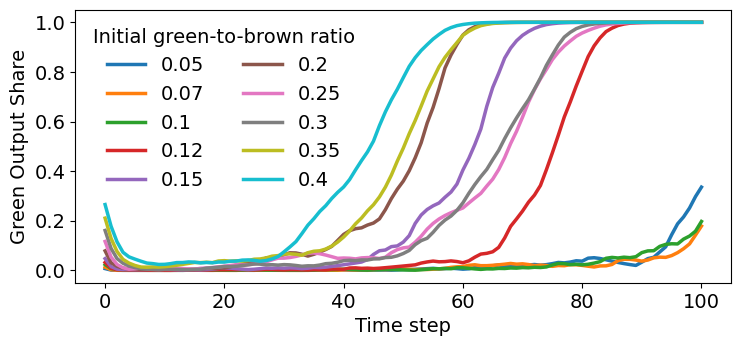

In [60]:
percs = [0.05,0.07,0.10,0.12,0.15,0.20,0.25,0.30,0.35,0.40]
eco_var = 'GOS'

plt.rcParams['font.size'] = 14
plt.figure(figsize=(215/25.4, 180/(2*25.4),))
for i, perc in enumerate(percs):
    stat = STATS.loc[i].loc[101]
    stat[eco_var].plot(label=f'{perc}', lw=2.5)
    
plt.legend(title='Initial green-to-brown ratio', ncols=2, frameon=False)
plt.xlabel('Time step')
plt.ylabel('Green Output Share')
#plt.show()
results_dir = os.path.join('state_space_exploration')
os.makedirs(results_dir, exist_ok=True)
plt.savefig(f"{results_dir}/green_transitions.png", bbox_inches='tight')

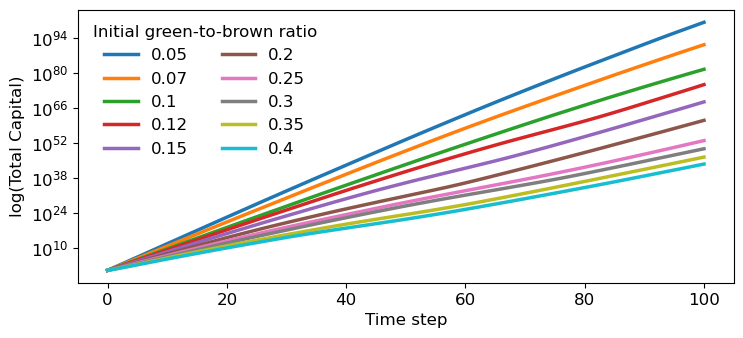

In [61]:
percs = [0.05,0.07,0.10,0.12,0.15,0.20,0.25,0.30,0.35,0.40]
eco_var = 'Total_K'

plt.rcParams['font.size'] = 12
plt.figure(figsize=(215/25.4, 180/(2*25.4),))
for i, perc in enumerate(percs):
    stat = STATS.loc[i].loc[101]
    stat[eco_var].plot(label=f'{perc}', lw=2.5)
    
plt.legend(title='Initial green-to-brown ratio', ncols=2, frameon=False)
plt.xlabel('Time step')
plt.ylabel('log(Total Capital)')
plt.yscale('log')
#plt.show()
plt.savefig(f"{results_dir}/total_capital.png", bbox_inches='tight')

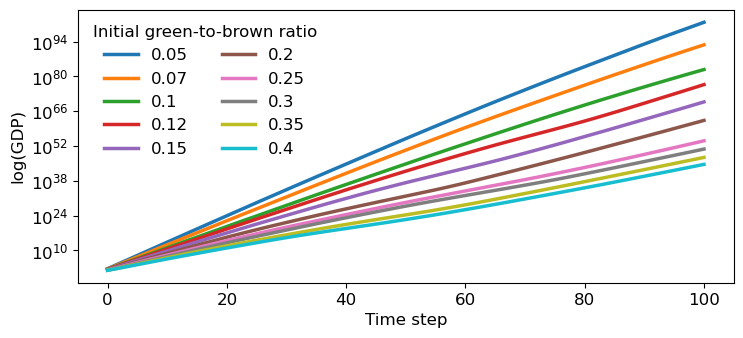

In [62]:
percs = [0.05,0.07,0.10,0.12,0.15,0.20,0.25,0.30,0.35,0.40]
eco_var = 'GDP'

plt.rcParams['font.size'] = 12
plt.figure(figsize=(215/25.4, 180/(2*25.4),))
for i, perc in enumerate(percs):
    stat = STATS.loc[i].loc[101]
    stat[eco_var].plot(label=f'{perc}', lw=2.5)
    
plt.legend(title='Initial green-to-brown ratio', ncols=2, frameon=False)
plt.xlabel('Time step')
plt.ylabel('log(GDP)')
plt.yscale('log')
#plt.show()

plt.savefig(f"{results_dir}/GDP.png", bbox_inches='tight')

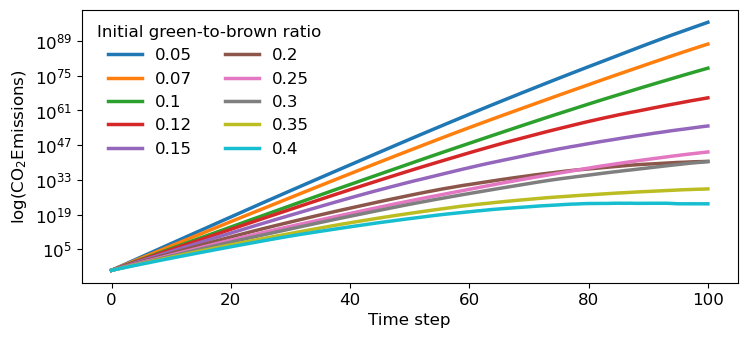

In [65]:
percs = [0.05,0.07,0.10,0.12,0.15,0.20,0.25,0.30,0.35,0.40]
eco_var = 'C_CO2'

plt.rcParams['font.size'] = 12
plt.figure(figsize=(215/25.4, 180/(2*25.4),))
for i, perc in enumerate(percs):
    stat = STATS.loc[i].loc[101]
    stat[eco_var].plot(label=f'{perc}', lw=2.5)
    
plt.legend(title='Initial green-to-brown ratio', ncols=2, frameon=False)
plt.xlabel('Time step')
plt.ylabel('log(CO'+r'$_2$'+ 'Emissions)')
plt.yscale('log')
#plt.show()
plt.savefig(f"{results_dir}/emissions.png", bbox_inches='tight')